<a href="https://colab.research.google.com/github/lucamachado49/modelo-previsao-mercado-acoes/blob/main/Apple_Stock_Price_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Define the Project Scope**

Objective: Predict stock prices or price direction (e.g., whether the price will increase or decrease).
Target Stocks: Select specific stocks, such as Apple (AAPL), or an index like the S&P 500.

# **Step 2: Data Collection**

Historical Data: Use libraries like yfinance to fetch historical stock data.


In [1]:
import yfinance as yf

# Fetch historical data for Apple
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2024-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.454505  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.465666  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.362822  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.351057  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.393281  447610800


# **Step 3: Data Preprocessing**

Cleaning: Handle missing values and duplicates.

In [2]:
# Handle missing values
data = data.dropna()

**Feature Selection**: Select relevant features like previous prices and volume.

**Normalization**: Normalize numerical features for better model performance.

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data[['Close']])


# **Step 4: Exploratory Data Analysis (EDA)**

**Visualizations**: Use Matplotlib or Seaborn to visualize historical prices and moving averages.

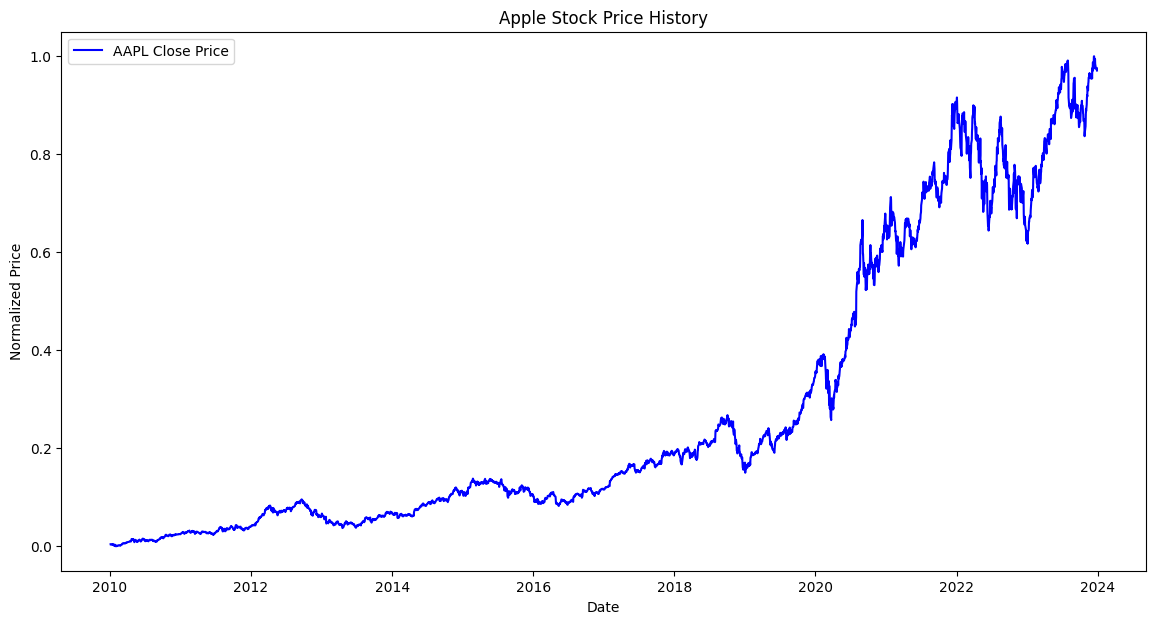

In [4]:
import matplotlib.pyplot as plt

# Plot historical closing prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='AAPL Close Price', color='blue')
plt.title('Apple Stock Price History')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


**Statistical Analysis**: Analyze correlations between features.

In [5]:
correlation_matrix = data.corr()
print(correlation_matrix['Close'].sort_values(ascending=False))


Close        1.000000
Adj Close    0.999950
Low          0.999893
High         0.999888
Open         0.999767
Volume      -0.529698
Name: Close, dtype: float64


# **Step 5: Feature Engineering**
**Create New Features:**


In [6]:
# Moving averages
data['MA_5'] = data['Close'].rolling(window=5).mean()
data['MA_20'] = data['Close'].rolling(window=20).mean()

# Relative Strength Index (RSI)
def RSI(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = RSI(data['Close'])

# Lagged features
data['Lag_1'] = data['Close'].shift(1)


# **Step 6: Model Selection**

**Choose Algorithms:** You can start with simple linear regression and then move to more complex models like Random Forest and LSTM.

**Train-Test Split:**

In [8]:
from sklearn.model_selection import train_test_split

features = ['MA_5', 'MA_20', 'RSI', 'Lag_1']
X = data[features].dropna()
y = data['Close'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 7: Model Training**
**Train the Model:** Fit different models and compare performance.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**Hyperparameter Tuning**: Use Grid Search or Random Search for optimization.

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_


# **Step 8: Model Evaluation**

**Performance Metrics:** Evaluate using MAE, MSE, and R-squared.

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')


MAE: 0.0037791707655980716, MSE: 5.5710297684910285e-05, R²: 0.9993149152001226


**Visualize Predictions:**

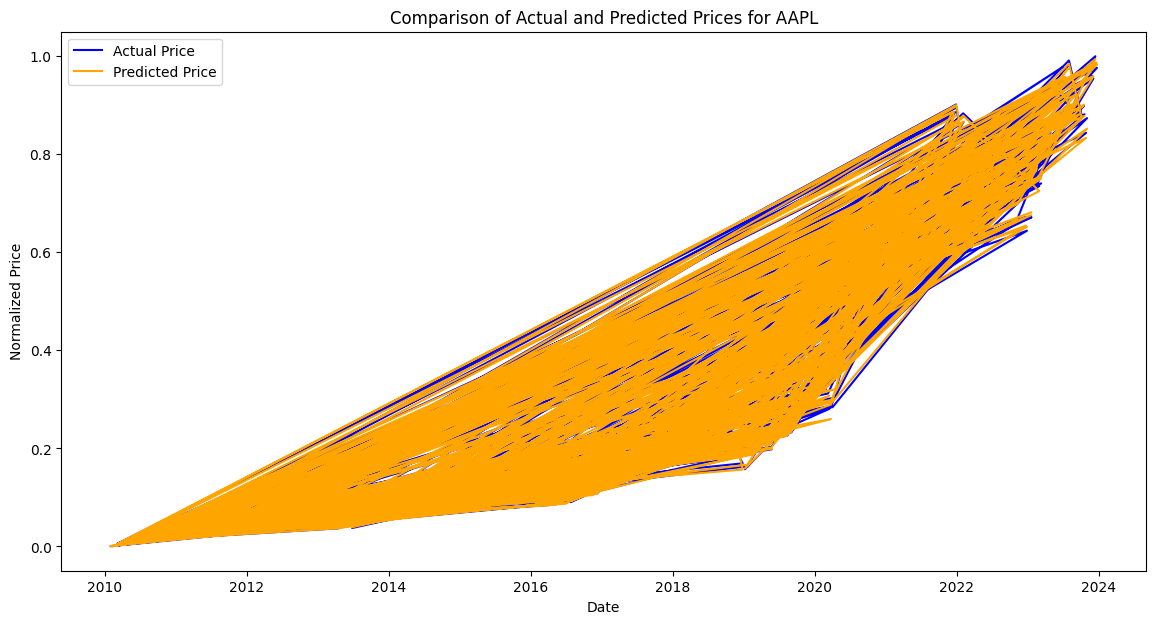

MAE: 0.0037795101689555685, MSE: 5.563538706358469e-05, R²: 0.9993158363965647


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming you have your features in a variable named 'X' and target in 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming 'best_rf_model' from previous code is the trained model
modelo_rf = best_rf_model

# Make predictions for the test set
y_pred = modelo_rf.predict(X_test)

# Create a DataFrame for comparison
results = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})

# Assign the index of y_test to results for correct plotting
results.index = y_test.index

# Plot Actual Prices vs Predicted Prices
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Actual Price'], label='Actual Price', color='blue')
plt.plot(results.index, results['Predicted Price'], label='Predicted Price', color='orange')
plt.title('Comparison of Actual and Predicted Prices for AAPL')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

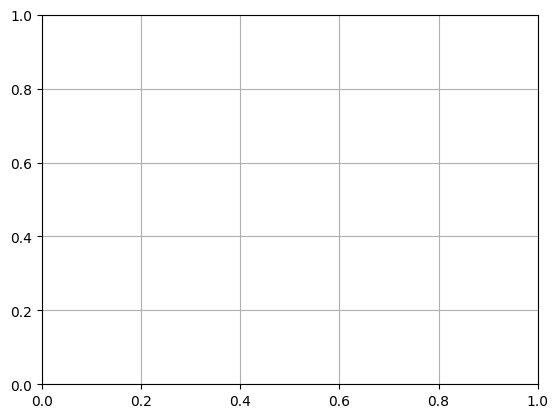

In [18]:
plt.grid(True)


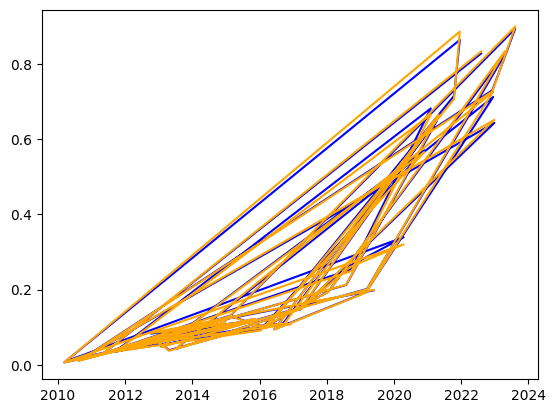

In [19]:
# Limitar os dados para os primeiros 50 pontos
plt.plot(results.index[:50], results['Actual Price'][:50], label='Actual Price', color='blue')
plt.plot(results.index[:50], results['Predicted Price'][:50], label='Predicted Price', color='orange')


# **Step 9: Model Deployment**

**API Development**: Use Flask to create a simple web API.


In [13]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = [data['MA_5'], data['MA_20'], data['RSI'], data['Lag_1']]
    prediction = rf_model.predict([features])
    return jsonify({'predicted_price': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


# **Step 10: Monitoring and Maintenance**
**Model Performance Tracking**: Continuously monitor the model’s predictions against actual prices and update as necessary.

**Regular Updates**: Implement a cron job or similar mechanism to update your model with new data periodically.

